In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Carga de datos

In [2]:
df = pd.read_csv('C:/Users/danie/OneDrive/Escritorio/Data Science/Machine Learning Projects/ecobici/df.csv')

C:\Users\danie\AppData\Local\Temp\ipykernel_3936\3591598595.py:1: DtypeWarning: Columns (0,4,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/danie/OneDrive/Escritorio/Data Science/Machine Learning Projects/ecobici/df.csv')


# Análisis

In [3]:
df.head(2)

,Bici,Genero_Usuario,Edad_Usuario,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo,salida_nombre,...,arribo_colonia,arribo_alcaldia,arribo_latitud,arribo_longitud,arribo_tipo_ce,arribo_candados,dia,mes,flujo_transito,flujos_estaciones
0,11253,F,35.0,286,2022-01-31,17:33.0,75,31/01/2022,24:14.0,13 de Septiembre - Avenida Patriotismo,...,Hipódromo Condesa,CUAUHTEMOC,19.408676,-99.176759,3G,15.0,Lunes,01/2022,de Escandón a Hipódromo Condesa,de la estacion 286 a la estación 75
1,11287,F,57.0,68,2022-01-31,55:03.0,231,31/01/2022,24:15.0,Tamaulipas - Michoacán,...,Polanco,MIGUEL HIDALGO,19.429770,-99.193490,3G,27.0,Lunes,01/2022,de Condesa a Polanco,de la estacion 68 a la estación 231


In [4]:
df.columns

Index(['Bici', 'Genero_Usuario', 'Edad_Usuario', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo',
       'Hora_Arribo', 'salida_nombre', 'salida_colonia', 'salida_alcaldia',
       'salida_latitud', 'salida_longitud', 'salida_tipo_ce',
       'salida_candados', 'arribo_nombre', 'arribo_colonia', 'arribo_alcaldia',
       'arribo_latitud', 'arribo_longitud', 'arribo_tipo_ce',
       'arribo_candados', 'dia', 'mes', 'flujo_transito', 'flujos_estaciones'],
      dtype='object')

### 1. ¿Qué día de la semana hay más viajes, usualmente?

In [5]:
df.dia.value_counts()

Miércoles    1010369
Jueves       1008864
Martes       1000761
Viernes       955969
Lunes         905739
Sábado        615409
Domingo       588527
Name: dia, dtype: int64

### 2. ¿Cuál ha sido la bici más usada y cuál la menos usada?

In [6]:
df.Bici.value_counts()

9089       1597
4280       1576
8268       1572
8715       1557
9289       1552
           ... 
10082         1
12000         1
9120          1
10347         1
4769626       1
Name: Bici, Length: 14613, dtype: int64

### 3. ¿En qué mes del 2022 hubo más viajes y en qué mes hubo menos viajes?

In [7]:
df.mes.value_counts()

03/2023    696575
05/2022    578473
02/2023    573245
03/2022    546829
01/2023    514151
06/2022    508033
04/2022    503933
02/2022    422734
07/2022    388896
12/2022    380561
01/2022    379488
11/2022    371622
10/2022    217385
12/2021      2330
11/2021      1122
10/2021       246
09/2022        15
Name: mes, dtype: int64

### 4. ¿Cuáles son las cinco estaciones de las que más salen bicis y cuáles fueron las que menos salidas reportaron?

In [8]:
print('Estaciones con más salidas: ', df.Ciclo_Estacion_Retiro.value_counts().head())
print('Estaciones con menos salidas: ', df.Ciclo_Estacion_Retiro.value_counts(ascending=True).head())

Estaciones con más salidas:  64    63402
1     46252
72    45689
53    41245
19    40625
Name: Ciclo_Estacion_Retiro, dtype: int64
Estaciones con menos salidas:  411     596
406    1037
376    1183
410    1241
403    1436
Name: Ciclo_Estacion_Retiro, dtype: int64


### 5. ¿Cuál es la estación a la que llegan más bicis? ¿Cuál es la estación a la que menos bicis llegan?

In [9]:
print('Estaciones con más llegadas de bicis: ', df.Ciclo_EstacionArribo.value_counts().head())
print('Estaciones con menos llegadas de bicis: ', df.Ciclo_EstacionArribo.value_counts(ascending=True).head())

Estaciones con más llegadas de bicis:  64    65778
1     47428
72    44573
43    44270
29    43834
Name: Ciclo_EstacionArribo, dtype: int64
Estaciones con menos llegadas de bicis:  411     685
376     980
403    1063
406    1099
364    1206
Name: Ciclo_EstacionArribo, dtype: int64


### 6. ¿Cuál es la colonia a la que llegan más bicis? ¿Cuál es la colonia a la que menos bicis llegan?

In [10]:
print('Colonias a las que llegan bicis: ', df.arribo_colonia.value_counts().head())
print('Colonias a las que llegan menos bicis: ', df.arribo_colonia.value_counts(ascending=True).head())

Colonias a las que llegan bicis:  Roma Norte    887937
Juárez        574986
Hipódromo     484441
Centro        479801
Cuauhtémoc    478049
Name: arribo_colonia, dtype: int64
Colonias a las que llegan menos bicis:  Lomas de Chapultepec Sección V                    6406
Modelo Pensil                                     7276
Lomas de Chapultepec Sección IV/Lomas Virreyes    7517
Centro Urbano Presidente Alemán                   8728
Cuauhtémoc Pensil                                 9570
Name: arribo_colonia, dtype: int64


### 7. ¿De qué colonia a qué colonia de la ciudad hay más viajes?

In [11]:
df.flujo_transito.value_counts().head()

de Roma Norte a Roma Norte    258322
de Polanco a Polanco          169966
de Centro a Centro            154982
de Juárez a Juárez            125301
de Cuauhtémoc a Cuauhtémoc    104929
Name: flujo_transito, dtype: int64

### 8. ¿Cuáles son las principales rutas de viaje en términos de estaciones? ¿Cuáles son las rutas menos transitadas? 

In [12]:
# Rutas mas transitadas
df.flujos_estaciones.value_counts().head()

de la estacion 30 a la estación 30      6324
de la estacion 391 a la estación 391    3935
de la estacion 33 a la estación 33      3581
de la estacion 7 a la estación 7        3543
de la estacion 372 a la estación 370    3378
Name: flujos_estaciones, dtype: int64

In [13]:
# Rutas menos transitadas
df.flujos_estaciones.value_counts(ascending=True).head()

de la estacion 399 a la estación 251    1
de la estacion 61 a la estación 364     1
de la estacion 422 a la estación 319    1
de la estacion 81 a la estación 352     1
de la estacion 308 a la estación 107    1
Name: flujos_estaciones, dtype: int64

### 9. ¿Cuál es la edad promedio de los usuarios?


<AxesSubplot: >

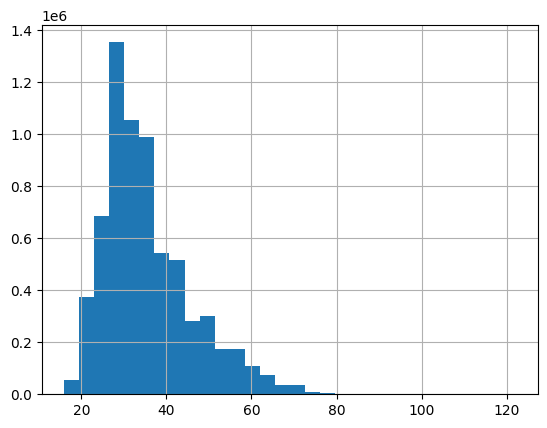

In [14]:
df.Edad_Usuario.hist(bins=30)

In [15]:
df.Edad_Usuario.mean()

35.55295605629334

In [19]:
df.Edad_Usuario.describe().round(2)

count    6770321.00
mean          35.55
std           10.26
min           16.00
25%           28.00
50%           33.00
75%           41.00
max          122.00
Name: Edad_Usuario, dtype: float64

### 10. ¿Cómo se agrupan los usuarios en términos de género?

In [22]:
df.Genero_Usuario.value_counts()

M    4832790
F    1843277
O      94254
Name: Genero_Usuario, dtype: int64

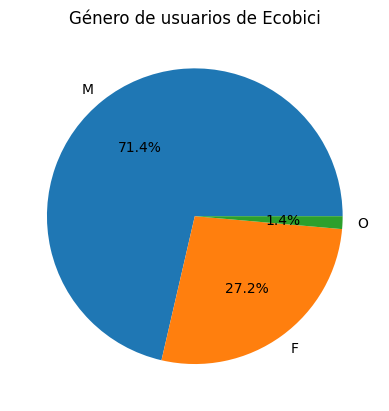

In [23]:
import matplotlib.pyplot as plt
valores = df['Genero_Usuario'].value_counts()
plt.pie(valores, labels=valores.index, autopct='%1.1f%%')
plt.title('Género de usuarios de Ecobici')
plt.show()